# DATA 601- Working with Data Visualization

# Team Project: Impact of Weather and Community Disorder on Crime in Calgary 
## University of Calgary | Faculty of Graduate Studies & Faculty of Science

## Submitted by: 
* ## Joshua Ogunbo | 30272413
* ## Prince Oloma | 30263726
* ## Ravin Jayasuriya| 30022788

## Submitted to: Syyed Tauhid Ullah Shah 

## Date Submitted: February 13, 2025

## Repository Link: https://github.com/Ravin-J/DATA-601-Final-Project

# Table of Contents
1. [Introduction](#introduction)
2. [Guiding Questions](#guiding-questions)
3. [Packages](#packages)
4. [Datasets](#datasets)
5. [Wrangling](#wrangling)
6.  [Analysis](#analysis)
    1. [Question 1: What are the types and counts of crimes that occurred in the last 5 years?](#q-1)
    2. [Question 2: Which are the top 5 recurring crimes for each season in the last 5 years?](#q-2)
    3. [Question 3: Which ward has the highest crime rate in the last 5 years?](#q-3)
    4. [Question 4: Identifying relationship between crime count and disorder count. ](#q-4)
7.  [Conclusions and Suggestions](#conclusion)
8.  [Contributions](#contributions)
9.  [References](#references)



## 1. Introduction <a name="introduction"></a>

This study examines the relationship between crime rates, community disorder and weather patterns across Calgary’s wards. By analyzing historical crime data alongside weather data, the study aims to determine whether weather conditions influence fluctuations in crime rates.  

Understanding this relationship will provide valuable insights for policymakers, law enforcement agencies, and community stakeholders. This will enable the development of data-driven strategies for crime prevention and enhanced public safety. 



## 2. Guiding Questions <a name="guiding-questions"></a>

Question 1: What are the types and counts of crimes that occurred in the last 5 years?
   

Question 2: Which are the top 5 recurring crimes for each season in the last 5 years?
  

Question 3: Which ward has the highest crime rate in the last 5 years?
  

Question 4: Is there a relationship between crime count and community disorder count?
 

## 3. Packages <a name="packages"></a>


**Pandas**

The Pandas Python library has been imported in order to easily manipulate numerical tables and time series data. It has enabled the team to read the dataset into the Jupyter Notebook.

**Matplotlib**

This Python library has been imported in order to create easy-to-read visualizations, including various plots, add customizations to styles and layouts of the visualizations, and embedded into the Jupyter Notebook. This library is used for our numeric variables to create visualizations such: Bar charts, Line Graph Series, Heat Maps e.t.c.

**Seaborn**

The Seaborn Python data visualization library has been imported to provide high-level and informative statistical graphics to capture the data story-telling aspect of the project. This library is used for our numeric variables to create visualizations such as: bar charts, Heat Maps. 

**Geopandas**

The geopandas library in Python is used for working with geospatial data. It extends the capabilities of pandas to handle spatial data types like points, lines, and polygons, making it easier to perform spatial operations and analysis. We used this library for plotting our HeatMaps showing geographical information of crime frequencies by ward.






In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

## 4. Datasets <a name="datasets"></a>

### Calgary Weather Dataset

The time period for this data is from 2018-2024



In [ ]:
calgary_weather_data_one_path = "./datasets/calgary_weather_data_20180101_20220101.csv"
calgary_weather_data_two_path = "./datasets/calgary_weather_data_20220101_20250101.csv"

calgary_weather_dfs = []
    
for index, path in enumerate([calgary_weather_data_one_path, calgary_weather_data_two_path] ):
    calgary_weather_dfs.append(pd.read_csv(path, encoding="latin-1"))

calgary_weather_df = pd.concat(calgary_weather_dfs, ignore_index=True)


display(calgary_weather_df.head())

,Station Name,Date (Local Standard Time),Air Temp. Avg. (°C),Air Temp. Avg. Source Flag,Air Temp. Avg. Record Completeness (%),Air Temp. Avg. Comment,Air Temp. Avg. Normal (°C),Air Temp. Avg. Normal Source Flag,Air Temp. Avg. Normal Comment
0,Calgary Int'L CS,January-2018,-6.9,AGGREGATED,100.0,"Completeness breakdown - Actual: 100%, Estimat...",NaN,NaN,NaN
1,Calgary Int'L CS,February-2018,-12.4,AGGREGATED,100.0,"Completeness breakdown - Actual: 100%, Estimat...",NaN,NaN,NaN
2,Calgary Int'L CS,March-2018,-5.8,AGGREGATED,100.0,"Completeness breakdown - Actual: 100%, Estimat...",NaN,NaN,NaN
3,Calgary Int'L CS,April-2018,1.0,AGGREGATED,100.0,"Completeness breakdown - Actual: 100%, Estimat...",NaN,NaN,NaN
4,Calgary Int'L CS,May-2018,14.1,AGGREGATED,100.0,"Completeness breakdown - Actual: 100%, Estimat...",NaN,NaN,NaN


### Calgary Community Crime Dataset
The time period for this data is from 2018-2024?


In [ ]:
calgary_communinty_crime_statistics_path = "./datasets/community_crime_statistics_calgary.csv"

calgary_crime_df = pd.read_csv(calgary_communinty_crime_statistics_path)

display(calgary_crime_df.head())

,Community,Category,Crime Count,Year,Month
0,01B,Assault (Non-domestic),1,2022,11
1,01B,Break & Enter - Commercial,1,2019,6
2,01B,Break & Enter - Commercial,1,2019,8
3,01B,Break & Enter - Commercial,2,2020,3
4,01B,Break & Enter - Commercial,2,2020,7


### Calgary Community Ward Dataset
The time period for this data is from 2018-2024?

In [ ]:
calgary_communities_by_ward_path =  "./datasets/communities_by_ward_calgary.csv"

calgary_communities_by_ward_df = pd.read_csv(calgary_communities_by_ward_path)

display(calgary_communities_by_ward_df.head())

,COMM_CODE,CLASS,CLASS_CODE,NAME,SECTOR,SRG,COMM_STRUCTURE,WARD_NUM
0,CRA,Residential,1,CRANSTON,SOUTHEAST,COMPLETE,BUILDING OUT,12
1,PKH,Residential,1,PARKHILL,CENTRE,ESTABLISHED,1950s,8
2,CRE,Residential,1,CRESCENT HEIGHTS,CENTRE,ESTABLISHED,INNER CITY,7
3,ROY,Residential,1,ROYAL OAK,NORTHWEST,COMPLETE,2010s,1
4,ALP,Residential,1,ALPINE PARK,SOUTH,DEVELOPING,BUILDING OUT,13


### Calgary Community Disorder Dataset
The time period for this data is from 2018-2024?

For this data some communities were missin

In [ ]:
calgary_community_disorder_statistics_path = "./datasets/community_disorder_statistics_calgary.csv"
calgary_disorder_df = pd.read_csv(calgary_community_disorder_statistics_path)

display(calgary_disorder_df.head())

,Community,Category,Event Count,Year,Month
0,01B,Disorder,1,2018,2
1,01B,Disorder,2,2018,6
2,01B,Disorder,1,2018,8
3,01B,Disorder,1,2018,10
4,01B,Disorder,2,2018,11


## Calgary Geodata 

This is the city of calgary geodata map, which identifies the ward, and their geospatial data. 



In [ ]:
calgary_geodata_path = "./geos/calgary_wards_geo.geojson"

calgary_geo_map = gpd.read_file(calgary_geodata_path)
calgary_geo_map.rename(columns={'ward_num': 'Ward Number'}, inplace=True)
calgary_geo_map["Ward Number"] = calgary_geo_map["Ward Number"].astype(float)

if calgary_geo_map.crs.is_geographic:
    calgary_geo_map = calgary_geo_map.to_crs(epsg=3857)



## Cleaning & Wrangling <a name="wrangling"></a>


### Weather Data

Dropped columns that werent necessary. Kept the data for "Station Name", "Date (Local Standard Time)", "Air Temperature Average C". 

Split "Date (Local Standard Time)" into "Day" and "Month"

Renamed "Air Temp. Avg C" to "Avg Temp"

In [ ]:
calgary_weather_df[["Month", "Year"]] = calgary_weather_df["Date (Local Standard Time)"].str.split(
      "-", expand=True )

calgary_weather_df["Month"] = pd.to_datetime(calgary_weather_df["Month"], format="%B").dt.month
calgary_weather_df["Year"] = calgary_weather_df["Year"].astype(int)
calgary_weather_df["Avg Temp"] = calgary_weather_df["Air Temp. Avg. (°C)"].astype(float)

calgary_weather_df = calgary_weather_df.drop(columns=[
      "Date (Local Standard Time)",
      "Air Temp. Avg. (°C)",
      "Air Temp. Avg. Source Flag",
      "Air Temp. Avg. Record Completeness (%)",	
      "Air Temp. Avg. Comment",
      "Air Temp. Avg. Normal (°C)", 
      "Air Temp. Avg. Normal Source Flag",	
      "Air Temp. Avg. Normal Comment"])

display(calgary_weather_df.head())

,Station Name,Month,Year,Avg Temp
0,Calgary Int'L CS,1,2018,-6.9
1,Calgary Int'L CS,2,2018,-12.4
2,Calgary Int'L CS,3,2018,-5.8
3,Calgary Int'L CS,4,2018,1.0
4,Calgary Int'L CS,5,2018,14.1


Added in the season into the calgary_weather_df dataframe. This will be used for our seasonal analysis. The winter season is an edge case because it begins from the previous year december.


### Community Crime and Ward Data 

We merged the Community crime data with the ward data. Had to re-label the column name to WARD_NUM to "Ward Number" 

We peformed a left join merge on the crime and ward data using the Community column. 

In [ ]:

calgary_communities_by_ward_df  = calgary_communities_by_ward_df [["NAME", "WARD_NUM"]]
calgary_communities_by_ward_df .rename(columns={"NAME": "Community", "WARD_NUM": "Ward Number"}, inplace=True)

calgary_crime_wards_df = calgary_crime_df.merge(calgary_communities_by_ward_df [["Community", "Ward Number"]], on="Community", how="left")

print(calgary_crime_wards_df.head())

  Community                    Category  Crime Count  Year  Month  Ward Number
0       01B      Assault (Non-domestic)            1  2022     11          1.0
1       01B  Break & Enter - Commercial            1  2019      6          1.0
2       01B  Break & Enter - Commercial            1  2019      8          1.0
3       01B  Break & Enter - Commercial            2  2020      3          1.0
4       01B  Break & Enter - Commercial            2  2020      7          1.0


### Community Disorder, weather, crime, community wards
We merged in the community disorder dataset with the community crime dataset, weather dataset, and the community ward dataset. Some of the communities are missing the disorder count, so we filled those values with zero. 


In [ ]:
working_df = calgary_crime_wards_df.merge(calgary_weather_df[['Year', 'Month', 'Avg Temp']], on=['Year', 'Month'], how="left")   
working_df = working_df.merge(
    calgary_disorder_df[['Year','Month','Event Count', 'Community']], 
    on=['Year', 'Month', 'Community'], 
    how="left"
)

working_df["Disorder Count"] = working_df["Event Count"].fillna(0)

working_df.drop(columns=["Event Count"], inplace=True)

display(working_df.head())


,Community,Category,Crime Count,Year,Month,Ward Number,Avg Temp,Disorder Count
0,01B,Assault (Non-domestic),1,2022,11,1.0,-5.8,0.0
1,01B,Break & Enter - Commercial,1,2019,6,1.0,13.6,1.0
2,01B,Break & Enter - Commercial,1,2019,8,1.0,15.3,1.0
3,01B,Break & Enter - Commercial,2,2020,3,1.0,-4.6,0.0
4,01B,Break & Enter - Commercial,2,2020,7,1.0,16.6,2.0


### Handling the edge case for december 

We merged in the community disorder dataset with the community crime dataset, weather dataset, and the community ward dataset. Some of the communities are missing the disorder count, so we filled those values with zero. 

In [ ]:
def convert_month_season(month):
    if month in [0, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"

new_rows = []
for year in working_df["Year"].unique():
    df_december = working_df[(working_df["Year"] == year) & (working_df["Month"] == 12)].copy()
    if not df_december.empty:
        df_december["Year"] = year + 1  # Shift to the next year
        df_december["Month"] = 0  # Set Month to 0
        new_rows.append(df_december)

if new_rows:
    working_df = pd.concat([working_df] + new_rows, ignore_index=True)
    working_df = working_df.sort_values(by=["Year", "Month"], ascending=[True, True])


working_df["Season"] = working_df["Month"].apply(convert_month_season)

display(working_df.head())

,Community,Category,Crime Count,Year,Month,Ward Number,Avg Temp,Disorder Count,Season
11,01B,Theft FROM Vehicle,1,2018,1,1.0,-6.9,0.0,Winter
34,01K,Assault (Non-domestic),1,2018,1,1.0,-6.9,0.0,Winter
54,01K,Break & Enter - Commercial,1,2018,1,1.0,-6.9,0.0,Winter
62,01K,Theft FROM Vehicle,1,2018,1,1.0,-6.9,0.0,Winter
99,01K,Violence 'Other' (Non-domestic),1,2018,1,1.0,-6.9,0.0,Winter


In [ ]:
test_1 = working_df[(working_df["Year"] == 2018) & (working_df["Month"] == 11)  & (working_df["Community"] == "02K") ]
print(test_1)

test_2 = working_df[(working_df["Year"] == 2019) & (working_df["Month"] == 0) &(working_df["Category"] == "Theft FROM Vehicle") & (working_df["Community"] == "02K") ]
print(test_2)

    Community                          Category  Crime Count  Year  Month  \
302       02K  Violence  'Other' (Non-domestic)            1  2018     11   

     Ward Number  Avg Temp  Disorder Count Season  
302          2.0      -0.7             0.0   Fall  
      Community            Category  Crime Count  Year  Month  Ward Number  \
80136       02K  Theft FROM Vehicle            2  2019      0          2.0   

       Avg Temp  Disorder Count  Season  
80136      -3.5             0.0  Winter  


## Year in View 

Our report is going to be based on the last five years from 2020-2024. 

In [ ]:
years_in_view = [2020, 2021, 2022, 2023, 2024]
city = "Calgary"

## 6 :Analysis <a name="analysis"></a>

## 6. Question 1: What are the types and counts of crimes that occurred in the last 5 years? <a name="#q-1"></a>
   - **6.1 Visualizations**
   - **6.2 Analysis**

We are going to find a distinct list of all the crime categories and their sum for each year in view and total. 

For visualization we are going to use a time series to display crime occurence by month for each category for each year. And we will also develop a plot that will aggregate all crime counts for the years in view. 



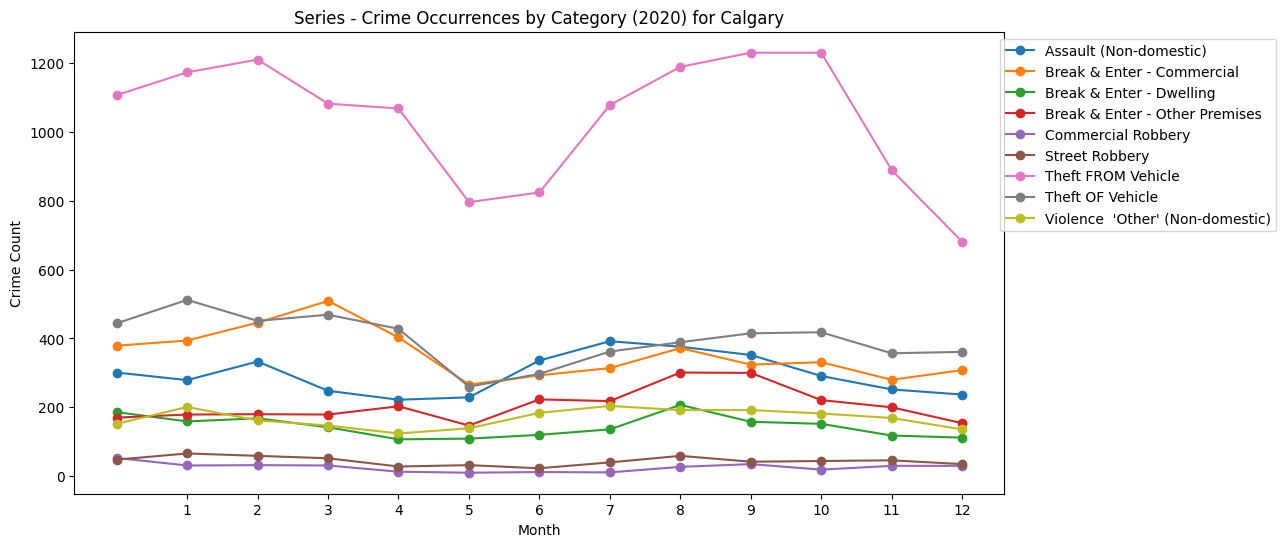

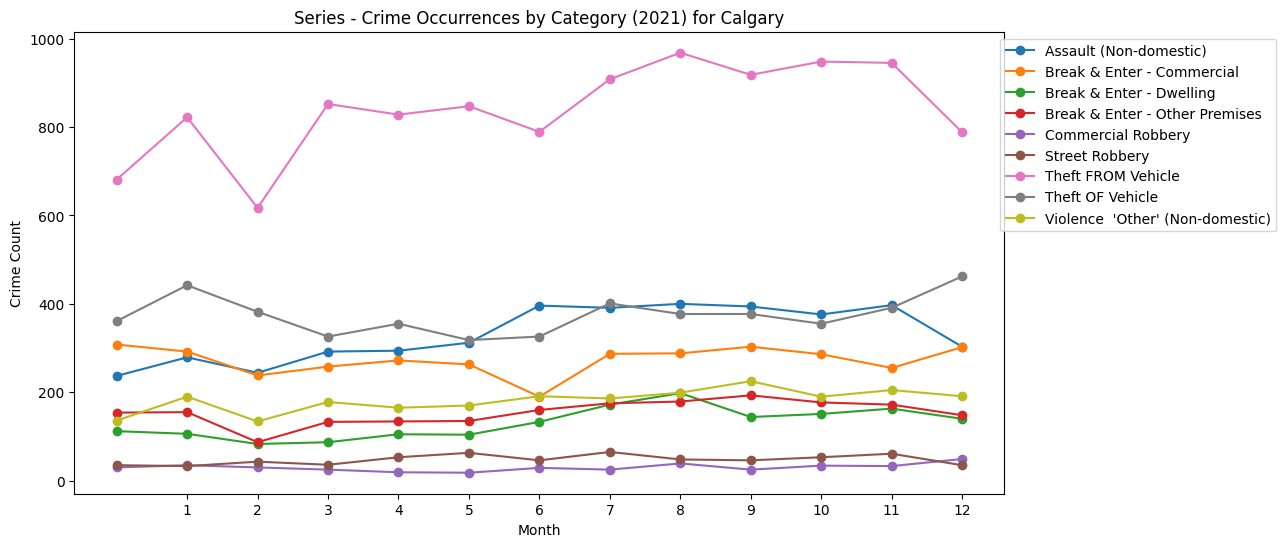

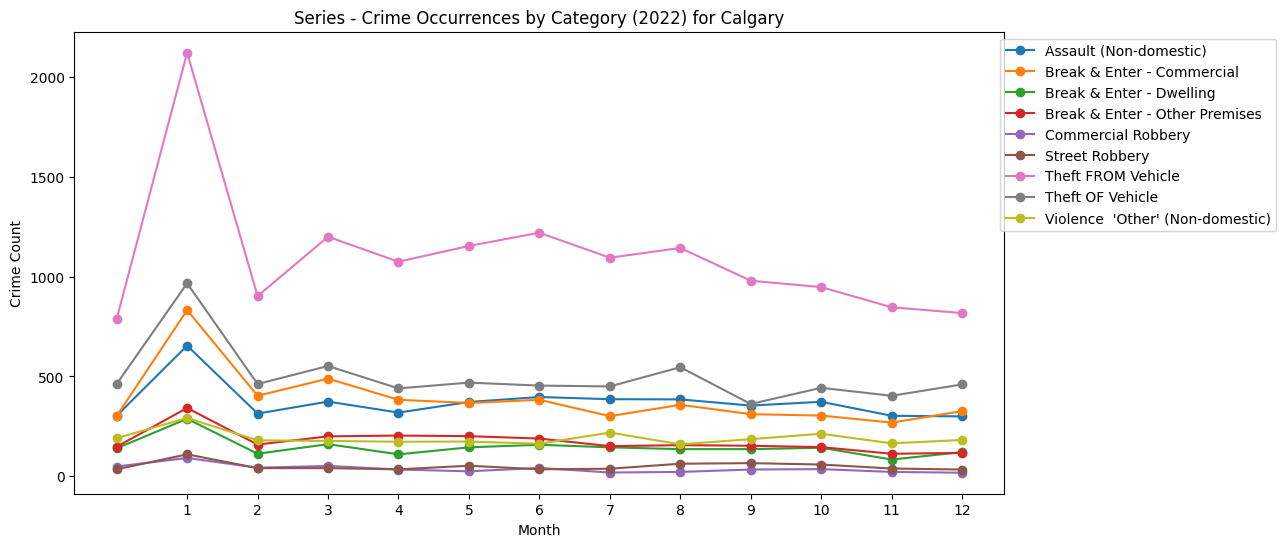

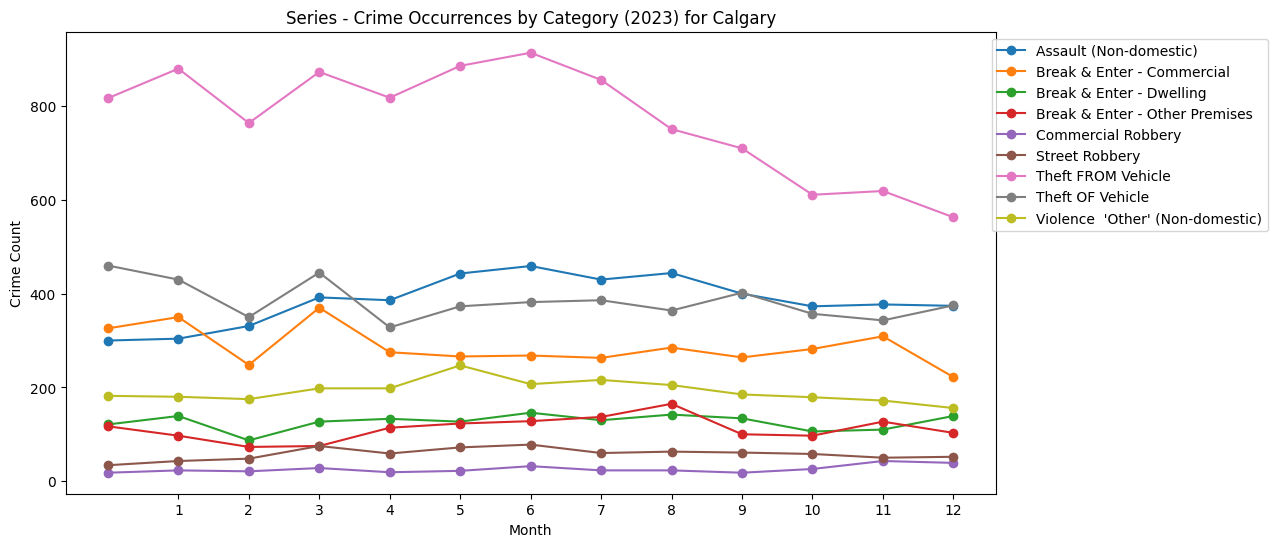

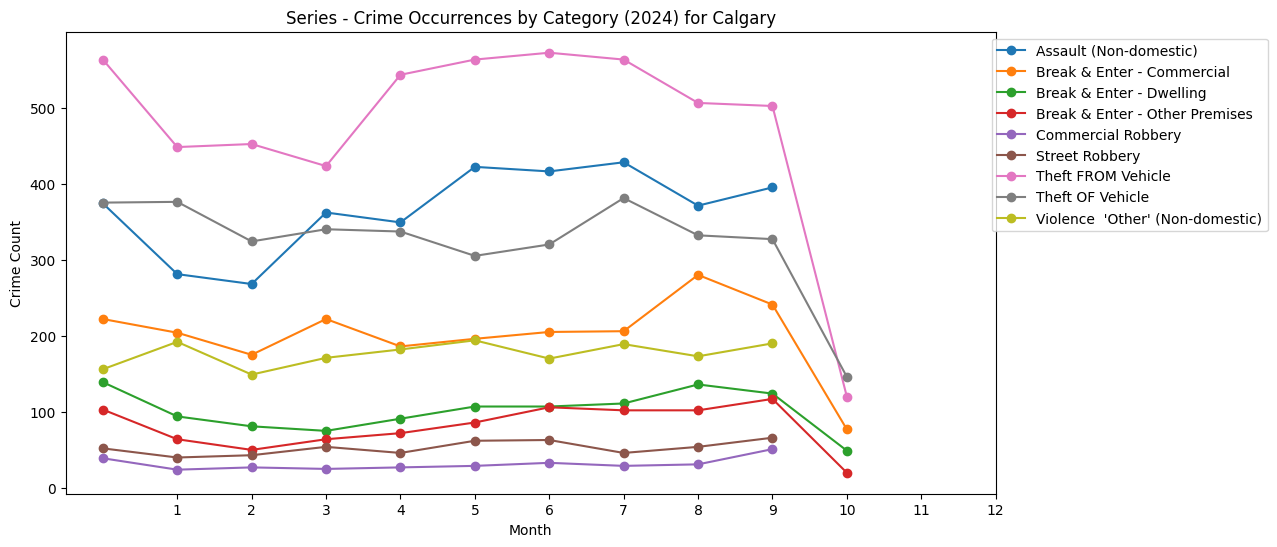

In [ ]:
for year in years_in_view:
    crime_year = working_df[working_df["Year"] == year]
    crime_grouped = (
        crime_year.groupby(["Category", "Month"])["Crime Count"].sum().reset_index()
    )

    plt.figure(figsize=(12, 6))

    for category in crime_grouped["Category"].unique():
        subset = crime_grouped[crime_grouped["Category"] == category]
        plt.plot(subset["Month"], subset["Crime Count"], marker="o", label=category)

    plt.xlabel("Month")
    plt.ylabel("Crime Count")
    plt.title(f"Series - Crime Occurrences by Category ({year}) for {city}")
    plt.xticks(range(1, 13))
    plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
    plt.show()




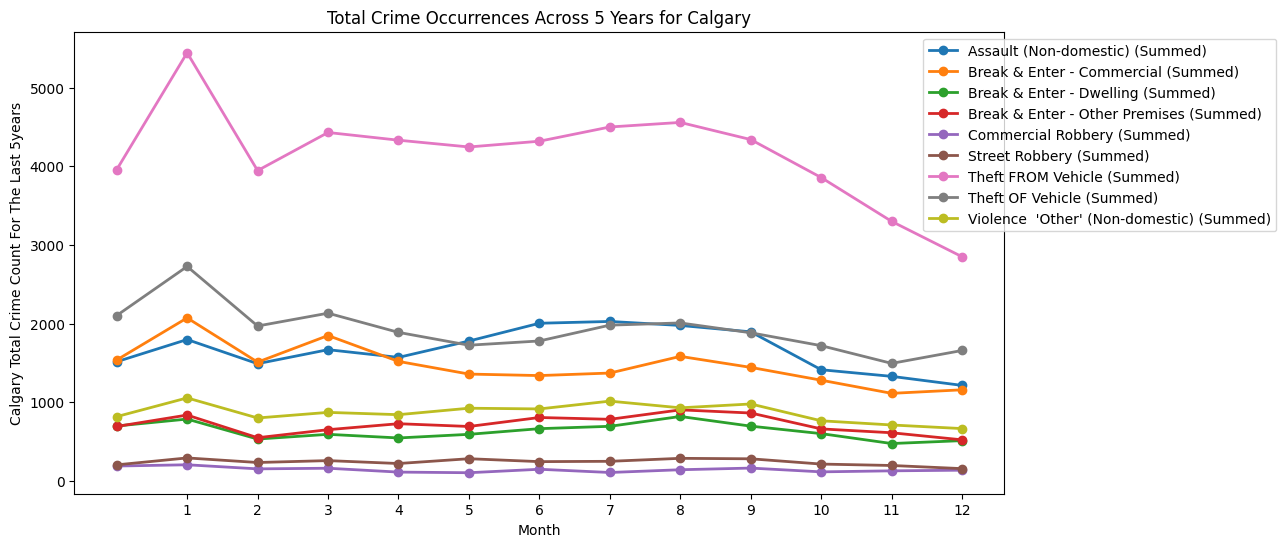

In [ ]:
filtered_df = working_df[working_df["Year"].isin(years_in_view)]

total_crime = (
    filtered_df.groupby(["Category", "Month"])["Crime Count"].sum().reset_index()
)

plt.figure(figsize=(12, 6))

for category in total_crime["Category"].unique():
    subset = total_crime[total_crime["Category"] == category]
    plt.plot(
        subset["Month"],
        subset["Crime Count"],
        marker="o",
        linewidth=2,
        label=f"{category} (Summed)",
    )

plt.xlabel("Month")
plt.ylabel(f"{city} Total Crime Count For The Last 5years")
plt.title(f"Total Crime Occurrences Across {len(years_in_view)} Years for {city}")
plt.xticks(range(1, 13))
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.show()

Analysis of  graphs above Crime occurences by category 

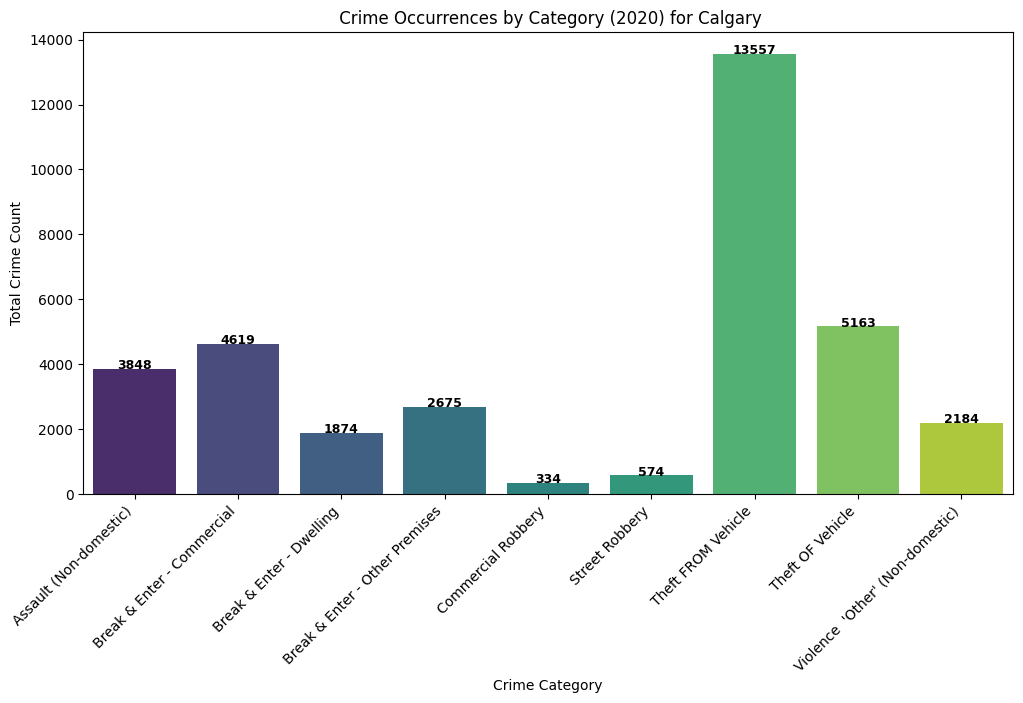

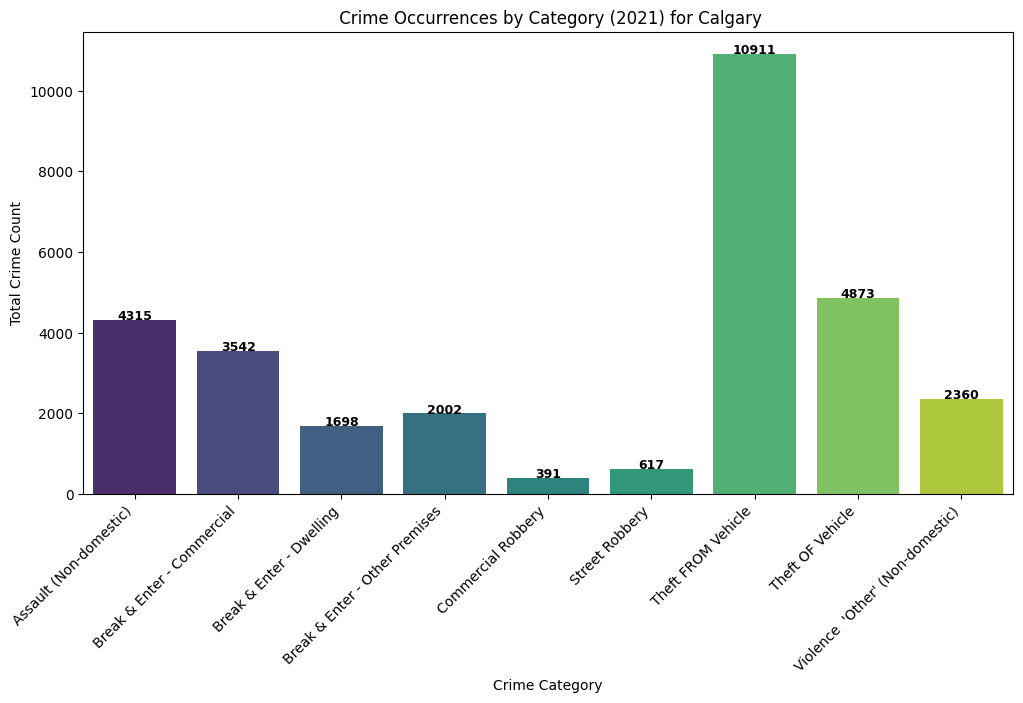

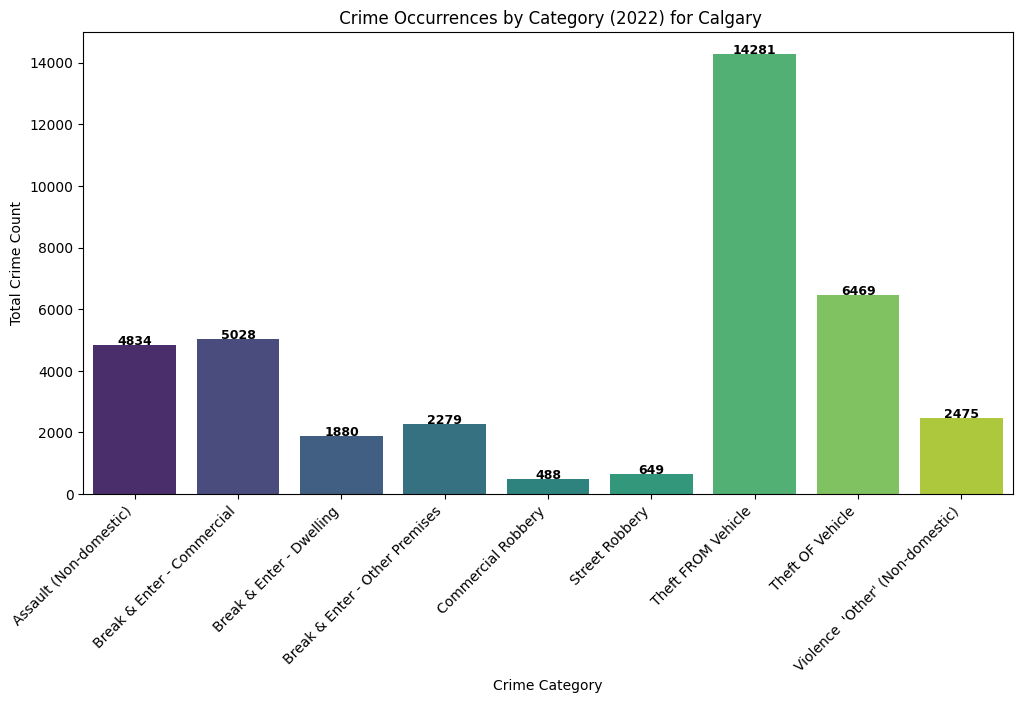

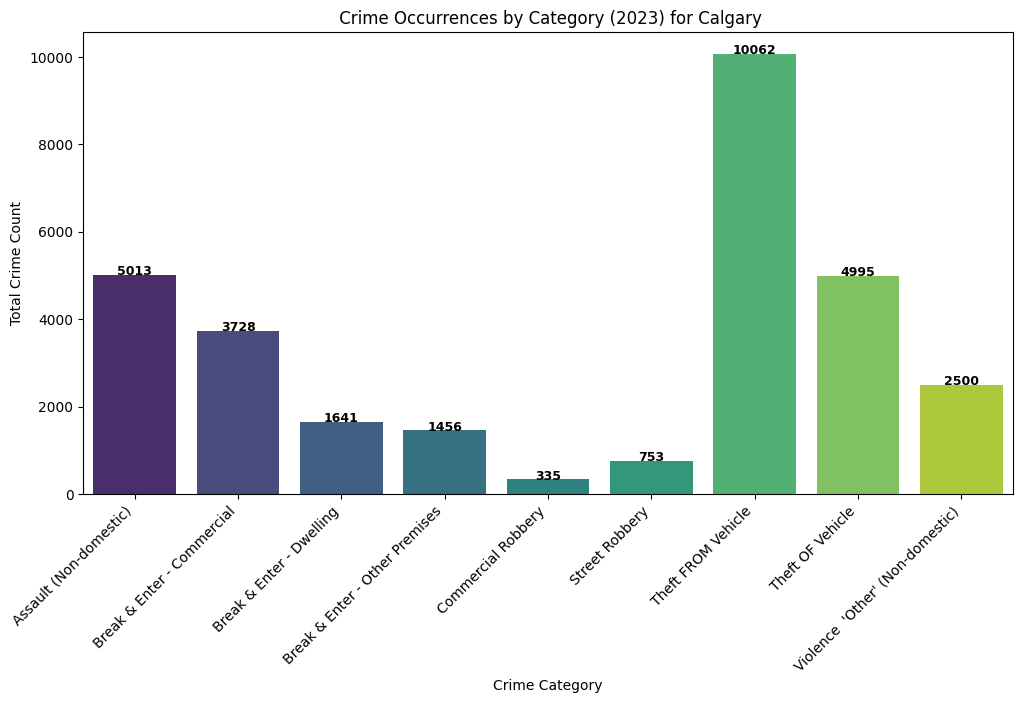

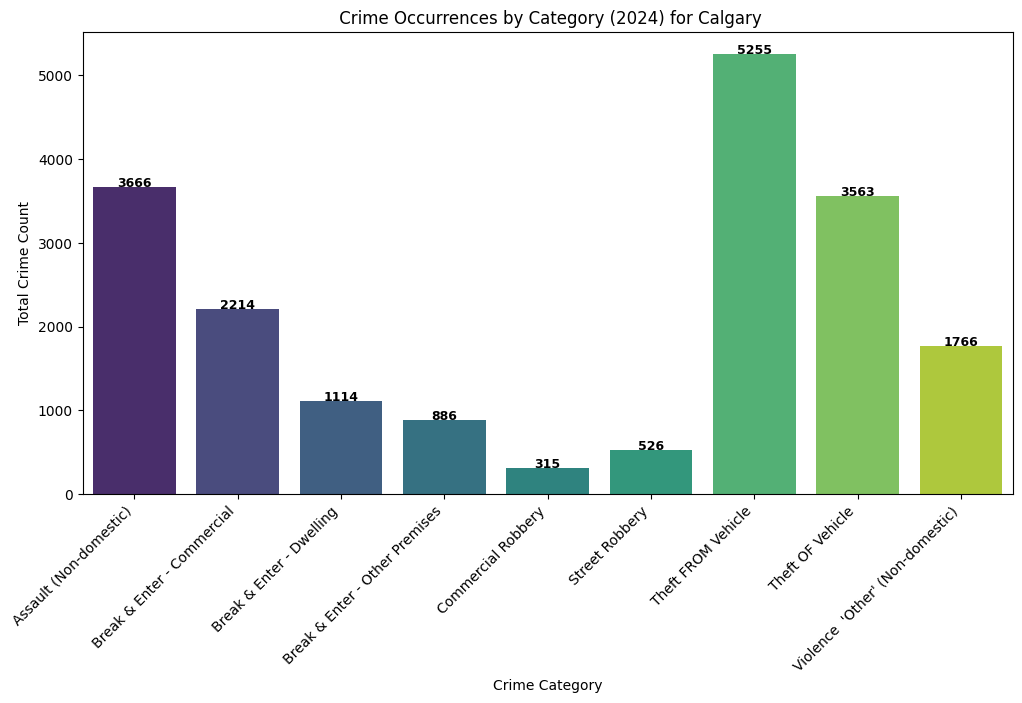

In [ ]:
for year in years_in_view:
    crime_year = working_df[working_df["Year"] == year]
    crime_grouped = crime_year.groupby("Category")["Crime Count"].sum().reset_index()

    plt.figure(figsize=(12, 6))

    sns.barplot(
        x="Category",
        y="Crime Count",
        hue="Category",
        data=crime_grouped,
        palette="viridis",
        legend=False  # Remove legend since hue is used for colors
    )

    # Add annotations for each bar
    for index, row in crime_grouped.iterrows():
        plt.text(index, row["Crime Count"] + 2, f"{int(row['Crime Count'])}", 
                    ha="center", fontsize=9, fontweight="bold")

    plt.xlabel("Crime Category")
    plt.ylabel("Total Crime Count")
    plt.title(f" Crime Occurrences by Category ({year}) for {city}")
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
    plt.show()

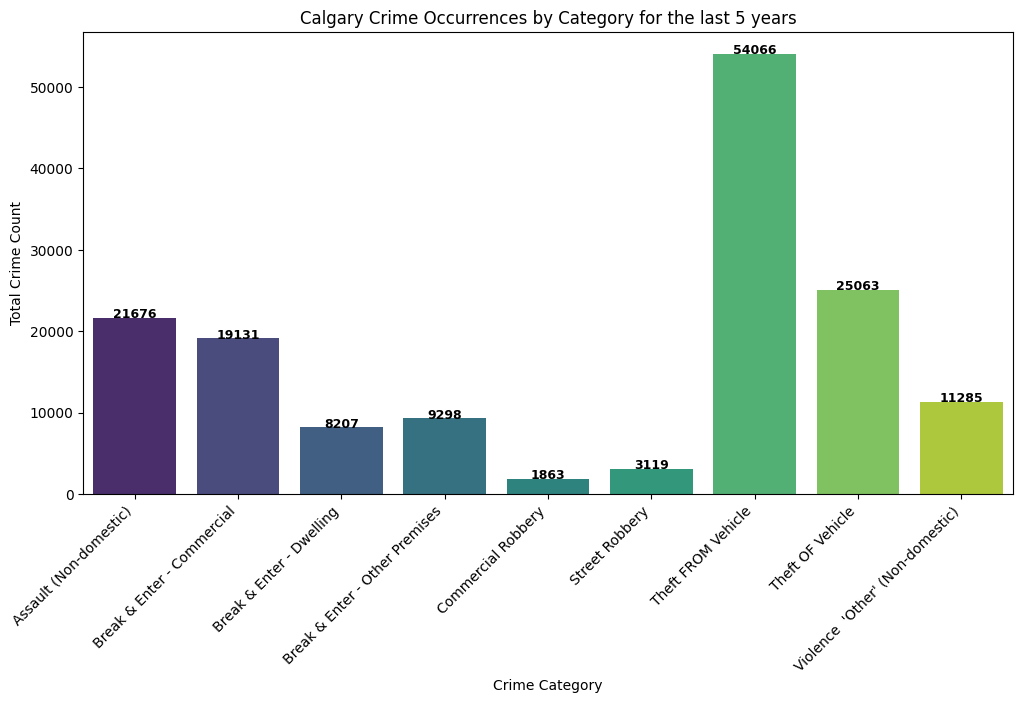

In [ ]:
crime_filtered = working_df[working_df["Year"].isin(years_in_view)]
crime_grouped = crime_filtered.groupby("Category")["Crime Count"].sum().reset_index()

plt.figure(figsize=(12, 6))

sns.barplot(
    x="Category",
    y="Crime Count",
    hue="Category",
    data=crime_grouped,
    palette="viridis",
    legend=False  # Remove legend since hue is used for colors
)

# Add annotations for each bar
for index, row in crime_grouped.iterrows():
    plt.text(index, row["Crime Count"] + 2, f"{int(row['Crime Count'])}", 
                ha="center", fontsize=9, fontweight="bold")

plt.xlabel("Crime Category")
plt.ylabel("Total Crime Count")
plt.title(f"{city} Crime Occurrences by Category for the last 5 years")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()

Discuss results above about totalss

## 7. Question 2: Which are the top 5 recurring crimes for each season in the last 5 years? <a name="#q-2"></a>
   - **7.1 Visualizations**
   - **7.2 Analysis**

Make a note of crime data ending in october 2024. 

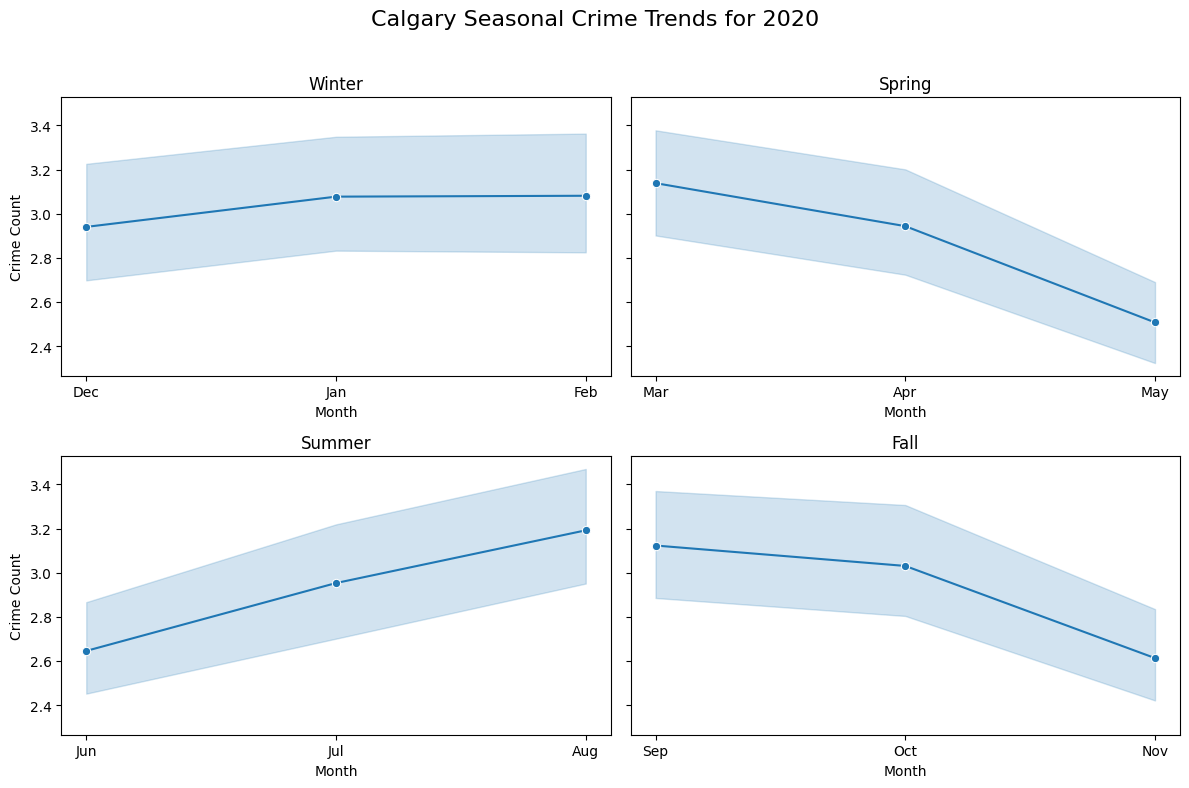

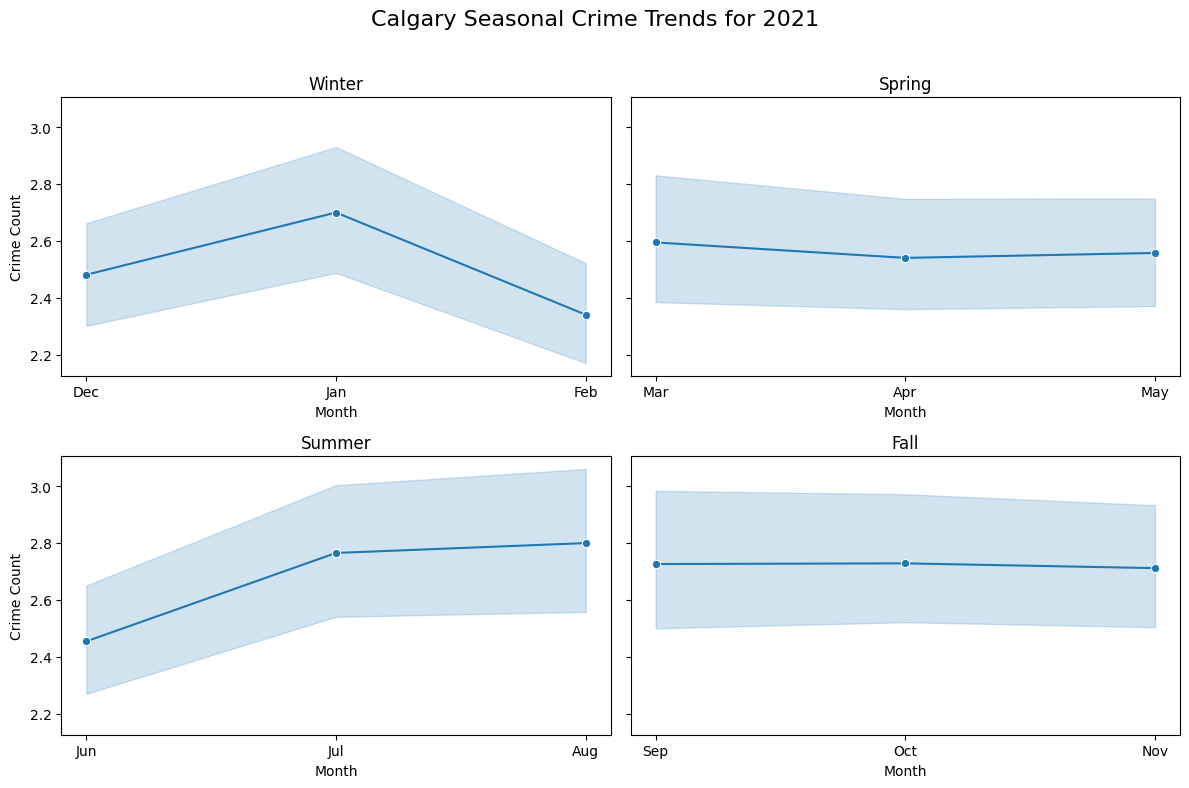

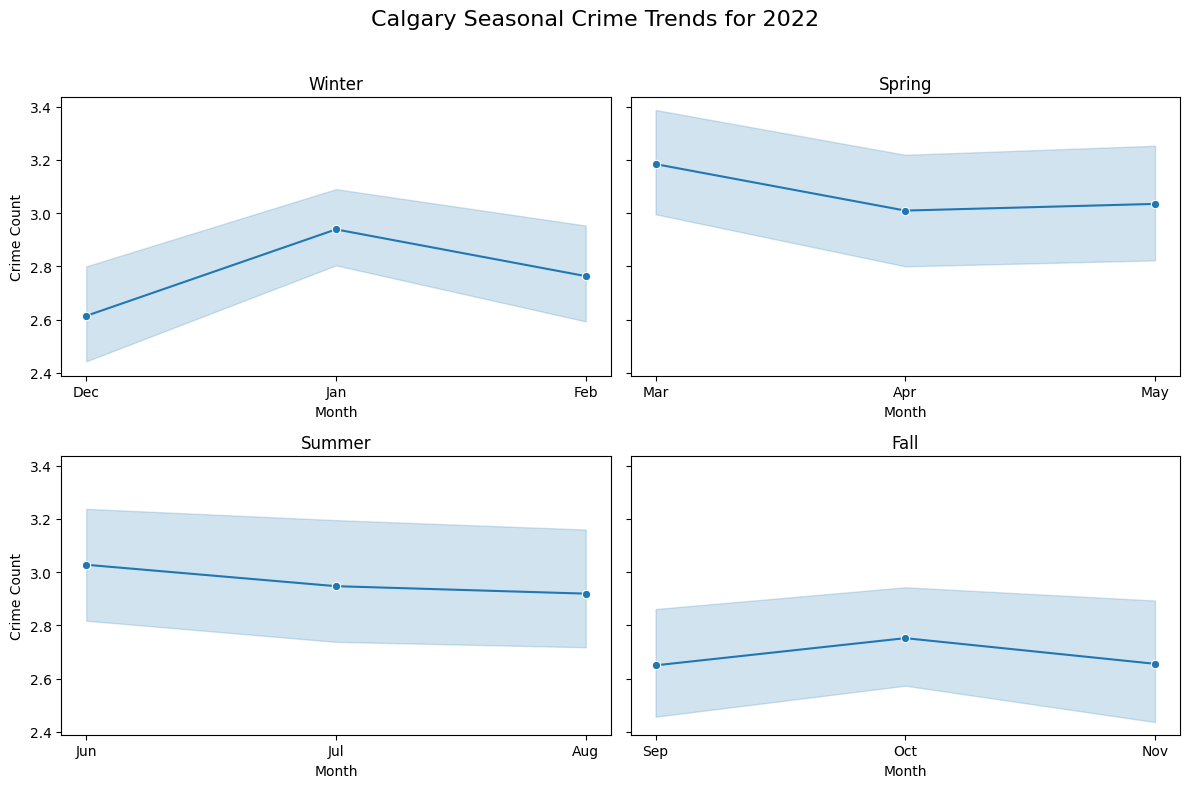

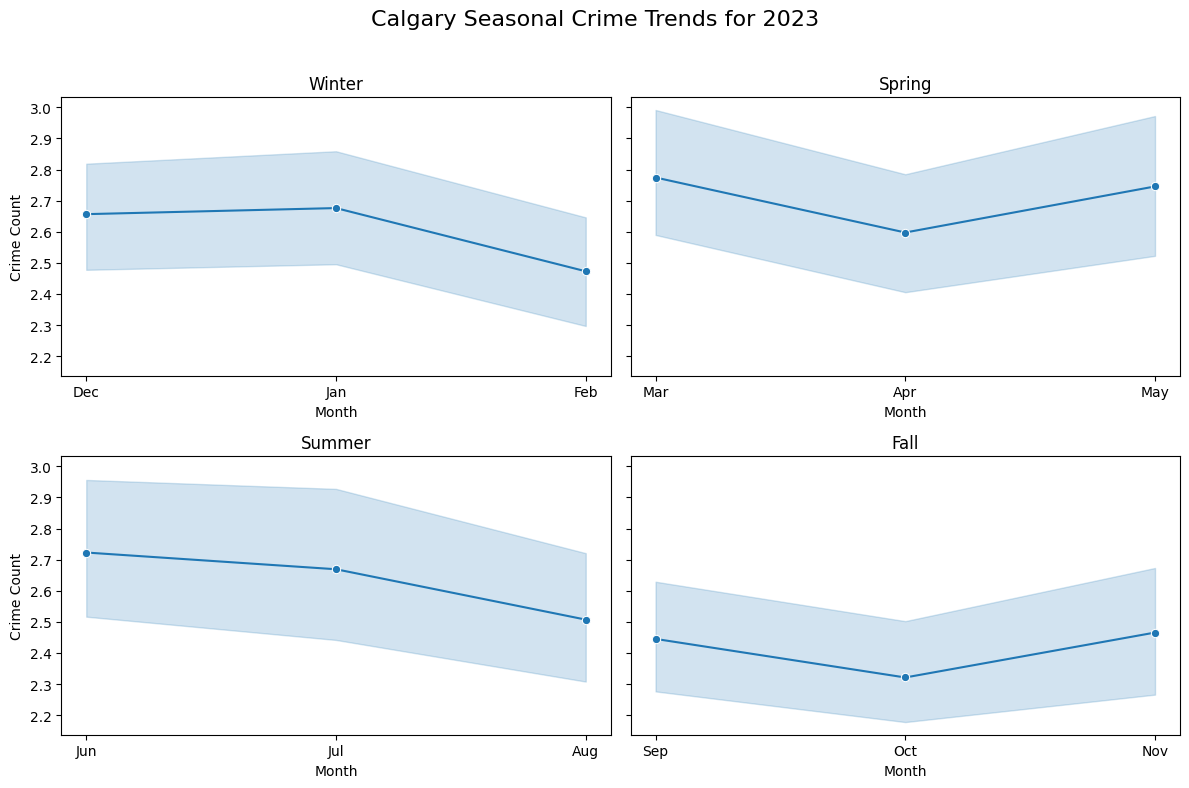

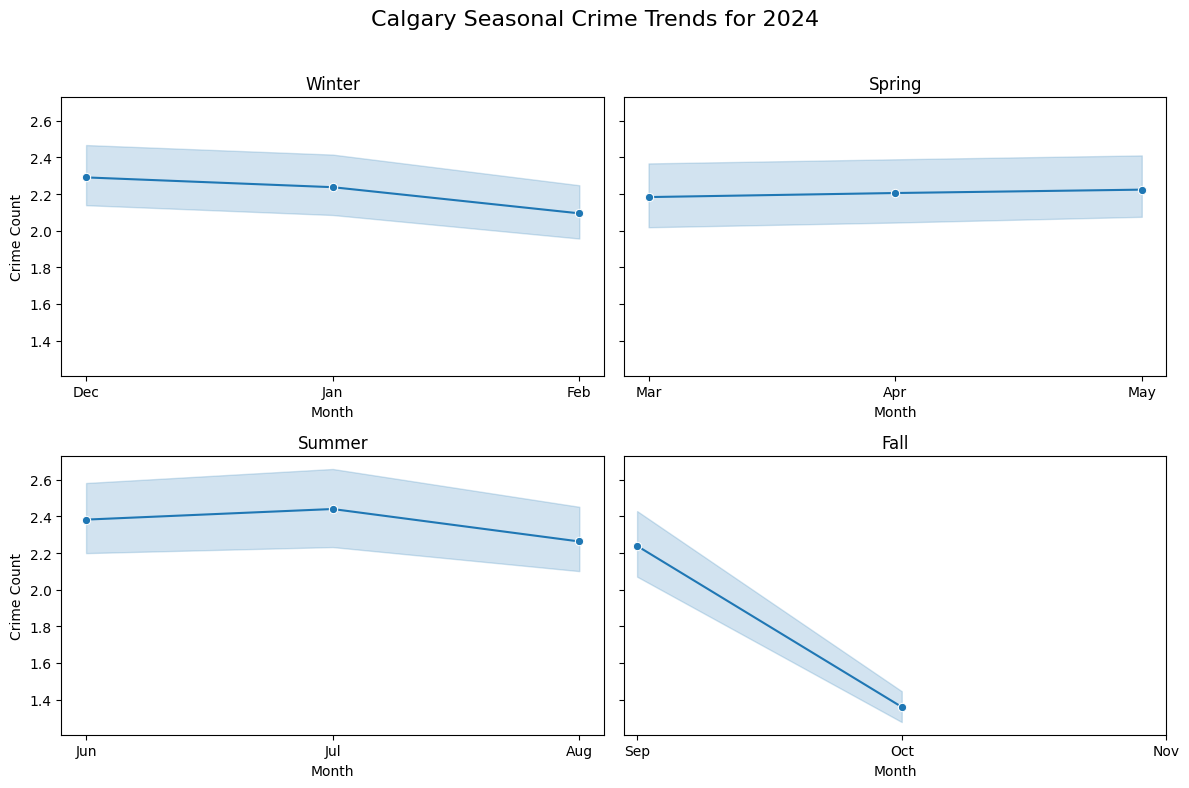

In [ ]:
df_extended = working_df.copy()
    
df_extended = df_extended.sort_values(by=["Year", "Month"], ascending=[True, True])

season_months = {
    "Winter": [0, 1, 2],  # December is now 0
    "Spring": [3, 4, 5],
    "Summer": [6, 7, 8],
    "Fall": [9, 10, 11]
}


for year in sorted(df_extended["Year"].unique())[-5:]:
    df_year = df_extended[df_extended["Year"] == year]
    seasons = ["Winter", "Spring", "Summer", "Fall"]
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
    fig.suptitle(f"{city} Seasonal Crime Trends for {year}", fontsize=16)
    
    for i, season in enumerate(seasons):
        df_season = df_year[df_year["Season"] == season].copy()
        
        df_season["AdjustedMonthCat"] = pd.Categorical(df_season["Month"].astype(int), 
                                                        categories=season_months[season], 
                                                        ordered=True)

        df_season = df_season.sort_values("AdjustedMonthCat")

        ax = axes[i // 2, i % 2]
        sns.lineplot(ax=ax, data=df_season, x="AdjustedMonthCat", y="Crime Count", marker="o")
        
        ax.set_title(season)
        ax.set_xlabel("Month")
        ax.set_ylabel("Crime Count")
        
        ax.set_xticks(season_months[season])
        ax.set_xticklabels(["Dec", "Jan", "Feb"] if season == "Winter" else 
                            ["Mar", "Apr", "May"] if season == "Spring" else 
                            ["Jun", "Jul", "Aug"] if season == "Summer" else 
                            ["Sep", "Oct", "Nov"])
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

Explain trends occuring above 

C:\Users\Ravin\AppData\Local\Temp\ipykernel_20364\3549629455.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, "Crime Count"))


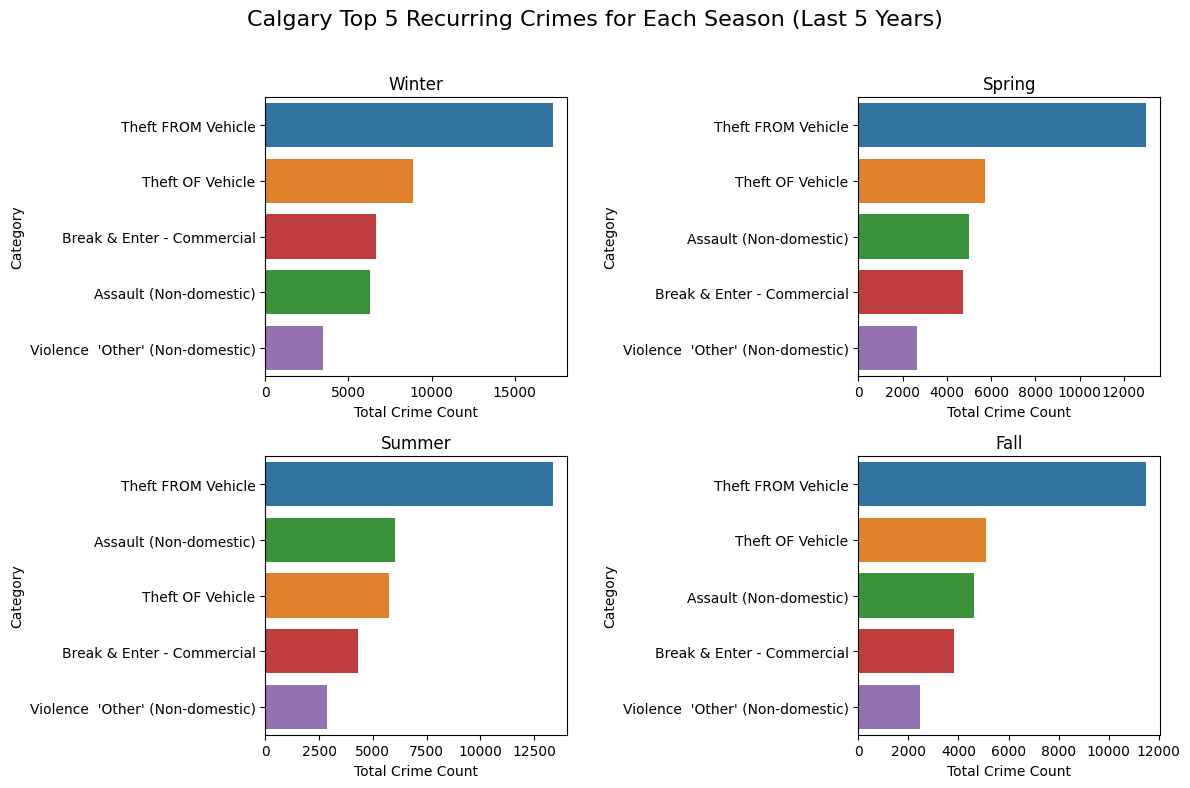

In [ ]:
df_extended = working_df.copy()
    
df_extended = df_extended.sort_values(by=["Year", "Month"], ascending=[True, True])

season_months = {
    "Winter": [0, 1, 2],  # December is now 0
    "Spring": [3, 4, 5],
    "Summer": [6, 7, 8],
    "Fall": [9, 10, 11]
}

# Create Month 0 rows by carrying over December values to the next year
new_rows = []
for year in df_extended["Year"].unique():
    df_december = df_extended[(df_extended["Year"] == year) & (df_extended["Month"] == 12)].copy()
    if not df_december.empty:
        df_december["Year"] = year + 1  # Shift to the next year
        df_december["Month"] = 0  # Set Month to 0
        new_rows.append(df_december)

if new_rows:
    df_extended = pd.concat([df_extended] + new_rows, ignore_index=True)
    df_extended = df_extended.sort_values(by=["Year", "Month"], ascending=[True, True])


df_extended["Season"] = df_extended["Month"].apply(convert_month_season)

df_last_5_years = df_extended[df_extended["Year"].isin(years_in_view)]

df_seasonal_crime = (
    df_last_5_years.groupby(["Season", "Category"], as_index=False)["Crime Count"]
    .sum()
)

top_5_per_season = (
    df_seasonal_crime.groupby("Season", group_keys=False, as_index=False)
    .apply(lambda x: x.nlargest(5, "Crime Count"))
    .reset_index(drop=True)
)

unique_categories = top_5_per_season["Category"].unique()
category_palette = sns.color_palette("tab10", n_colors=len(unique_categories))
category_colors = dict(zip(unique_categories, category_palette))


seasons = ["Winter", "Spring", "Summer", "Fall"]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle(f"{city} Top 5 Recurring Crimes for Each Season (Last 5 Years)", fontsize=16)

for i, season in enumerate(seasons):
    df_season = top_5_per_season[top_5_per_season["Season"] == season]
    ax = axes[i // 2, i % 2]
    
    sns.barplot(
        ax=ax,
        data=df_season,
        x="Crime Count",
        y="Category",
        hue="Category", 
        palette=category_colors,
        legend=False  # Disable legend in subplots
    )
    
    ax.set_title(season)
    ax.set_xlabel("Total Crime Count")
    ax.set_ylabel("Category")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
Analysis of question above thefot of vehicle

Assault increases during warmer weather, spring, summer, fall 

## 8. Question 3: Which ward has the highest crime rate in the last 5 years? <a name="#q-3"></a>
   - **8.1 Visualizations**
   - **8.2 Analysis**


Counting up all crimes within a ward, regardless of the category for the last 5 years. Then visualizing where we have the highest crime counts per ward using a heatmap. As well we created a map using geopandas map to better visualize the crime counts and the locations of the wards that have the highest crime counts. 



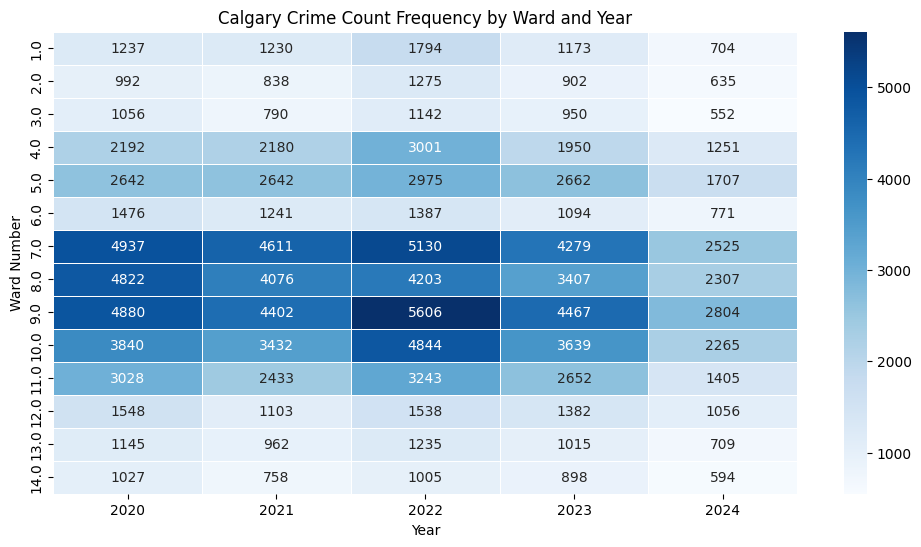

In [ ]:
df_extended = working_df.copy()

df_extended = df_extended[df_extended["Year"].isin(years_in_view)]

crime_count_by_ward_aggregated_by_year = (df_extended.groupby(['Ward Number', 'Year'])['Crime Count'].sum().reset_index())

crime_count_by_ward_aggregated_heatmap_data = crime_count_by_ward_aggregated_by_year.pivot(index='Ward Number', columns='Year', values='Crime Count')

plt.figure(figsize=(12, 6))
sns.heatmap(crime_count_by_ward_aggregated_heatmap_data, cmap="Blues", linewidths=0.5, annot=True, fmt=".0f")

plt.xlabel("Year")
plt.ylabel("Ward Number")
plt.title(f"{city} Crime Count Frequency by Ward and Year")
plt.show()

Analyze the results from above 

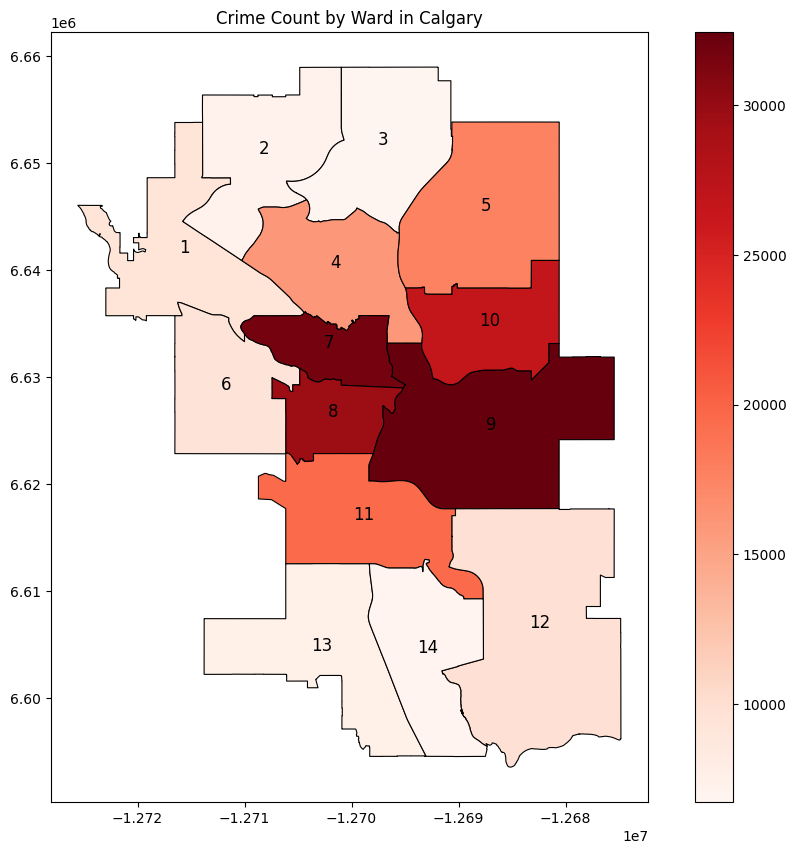

In [ ]:
crime_summary = working_df.groupby("Ward Number")["Crime Count"].sum().reset_index()
    
city_geo_df = calgary_geo_map.merge(crime_summary, on="Ward Number", how="left")

if city_geo_df.crs.is_geographic:
    city_geo_df = city_geo_df.to_crs(epsg=3857)

city_geo_df["centroid"] = city_geo_df.geometry.centroid

fig, ax = plt.subplots(figsize=(12, 10))

city_geo_df.plot(column="Crime Count", cmap="Reds", linewidth=0.8, edgecolor="black", legend=True, ax=ax)

for idx, row in city_geo_df.iterrows():
    centroid = row["centroid"]
    ax.text(centroid.x, centroid.y, str(int(row["Ward Number"])), fontsize=12, ha='center', color='black')

ax.set_title(f"Crime Count by Ward in {city}")

plt.show()

## 9. Question 4: Identifying relationship between crime count and disorder count. <a name="#q-4"></a>
   - **8.1 Visualizations**
   - **8.2 Analysis**


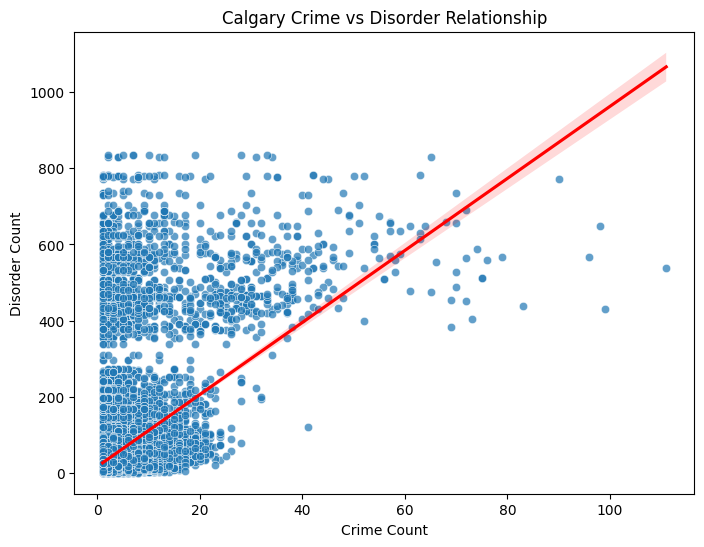

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=working_df['Crime Count'], y=working_df['Disorder Count'], alpha=0.7)
sns.regplot(x=working_df['Crime Count'], y=working_df['Disorder Count'], scatter=False, color='red')
plt.xlabel('Crime Count')
plt.ylabel('Disorder Count')
plt.title(f'{city} Crime vs Disorder Relationship')
plt.show()

Key Observations:

1. Positive Correlation:

• The red regression line with a shaded confidence interval suggests a positive linear relationship between crime and disorder counts. This means areas with higher crime incidents tend to have more disorder incidents.

2. Data Distribution:

• The majority of data points are clustered at the lower end of the crime count (between 0 and 20), while a few outliers exist at higher crime counts (above 60).

• There is a large spread in disorder counts even at low crime counts, indicating that some areas experience significant disorder even with a relatively low crime rate.

3. Outliers:

• A few points in the upper right (high crime and high disorder) and some points scattered above the regression line suggest that some locations experience disproportionate levels of disorder compared to crime.

4. Strength of Relationship:

• The strong linear trend suggests a moderate to strong correlation between crime and disorder, but it is not a perfect correlation. Some locations experience high disorder without corresponding high crime levels.

 

Potential Interpretation:

• This analysis suggests that in Calgary, disorderly activities (e.g., public disturbances, vandalism) tend to increase in areas with higher crime rates.

• However, crime and disorder are not identical—some areas with low crime still report high disorder, indicating other contributing factors such as social environment, population density, or law enforcement policies.

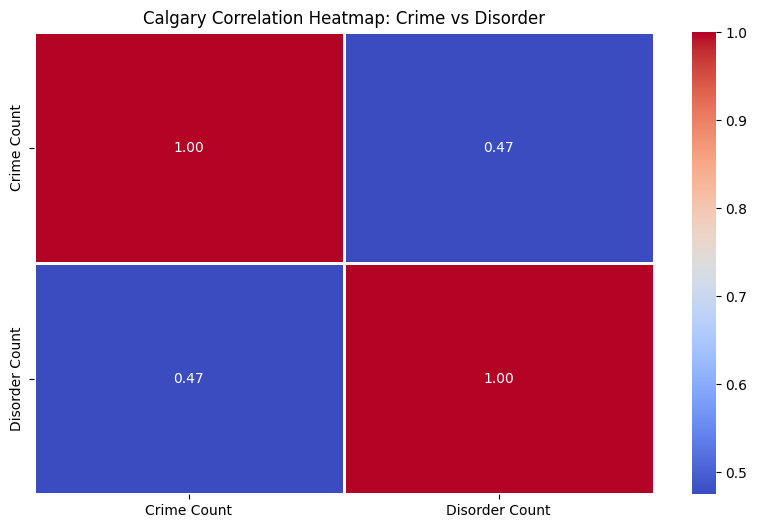

In [ ]:
corr_matrix = working_df[['Crime Count', 'Disorder Count']].corr()
    
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=2)
plt.title(f'{city} Correlation Heatmap: Crime vs Disorder')
plt.show()

## 10. Conclusions and Suggestions <a name="conclusion"></a>



## 11. Contributions <a name="contributions"></a>




### 12. References <a name="references"></a>